<h1>Comcast Telecom Consumer</h1> <br>

<b>DESCRIPTION :</b><br>
Comcast is an American global telecommunication company. The firm has been providing terrible customer service. They continue to fall short despite repeated promises to improve. Only last month (October 2016) the authority fined them a $2.3 million, after receiving over 1000 consumer complaints.
The existing database will serve as a repository of public customer complaints filed against Comcast.
It will help to pin down what is wrong with Comcast's customer service.

<b>Data Dictionary</b><br>
<i>
Ticket #: Ticket number assigned to each complaint<br>
Customer Complaint: Description of complaint<br>
Date: Date of complaint<br>
Time: Time of complaint<br>
Received Via: Mode of communication of the complaint<br>
City: Customer city<br>
State: Customer state<br>
Zipcode: Customer zip<br>
Status: Status of complaint<br>
Filing on behalf of someone<br><br></i>

<b>Analysis Task</b><br>
To perform these tasks, you can use any of the different Python libraries such as NumPy, SciPy, Pandas, scikit-learn, matplotlib, and BeautifulSoup.

- Import data into Python environment.<br>
- Provide the trend chart for the number of complaints at monthly and daily granularity levels.<br>
- Provide a table with the frequency of complaint types.<br>
- Which complaint types are maximum i.e., around internet, network issues, or across any other domains.
- Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.<br>
- Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on:<br>
- Which state has the maximum complaints<br>
- Which state has the highest percentage of unresolved complaints<br>
- Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.<br>

The analysis results to be provided with insights wherever applicable.<br>

<center><pre>======================================================================================
<h1>Coding Starts From Here</h1>
======================================================================================</pre></center>

<h2>Import data into Python environment</h2>

In [1]:
#Importing Required Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from tabulate import tabulate

ModuleNotFoundError: No module named 'tabulate'

In [161]:
#Reading File
df_telecom_comp = pd.read_csv("Comcast_telecom_complaints_data.csv")

In [162]:
#Dataframe View
df_telecom_comp

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No
...,...,...,...,...,...,...,...,...,...,...,...
2219,213550,Service Availability,04-02-15,04-Feb-15,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No
2220,318775,Comcast Monthly Billing for Returned Modem,06-02-15,06-Feb-15,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No
2221,331188,complaint about comcast,06-09-15,06-Sep-15,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No
2222,360489,Extremely unsatisfied Comcast customer,23-06-15,23-Jun-15,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No


In [163]:
#Dataframe Information
df_telecom_comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_month_year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   Received Via                 2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


In [164]:
#Checking for Null Count
df_telecom_comp[df_telecom_comp.isnull()].count()

Ticket #                       0
Customer Complaint             0
Date                           0
Date_month_year                0
Time                           0
Received Via                   0
City                           0
State                          0
Zip code                       0
Status                         0
Filing on Behalf of Someone    0
dtype: int64

<h2>Provide the trend chart for the number of complaints at monthly and daily granularity levels</h2>

In [165]:
#Conveting Date column from Obj to Date
df_telecom_comp['Date'] = pd.to_datetime(df_telecom_comp['Date'], format='%d-%m-%y')

In [166]:
#Date Column is changed to datetime64 type
df_telecom_comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Ticket #                     2224 non-null   object        
 1   Customer Complaint           2224 non-null   object        
 2   Date                         2224 non-null   datetime64[ns]
 3   Date_month_year              2224 non-null   object        
 4   Time                         2224 non-null   object        
 5   Received Via                 2224 non-null   object        
 6   City                         2224 non-null   object        
 7   State                        2224 non-null   object        
 8   Zip code                     2224 non-null   int64         
 9   Status                       2224 non-null   object        
 10  Filing on Behalf of Someone  2224 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(9)
m

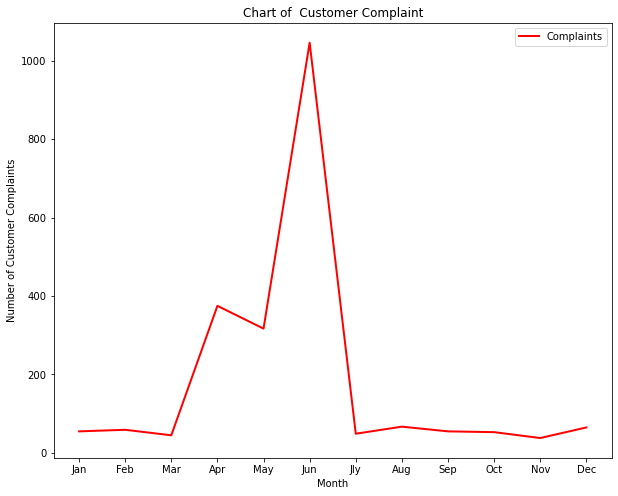

In [167]:
#Monthly Customer Complaints
    #Monthly Plot using Dataframe Plot
    #df_telecom_comp['Date'].dt.month.value_counts().sort_index().plot()
plt.figure(figsize=(10,8))
plt.plot(sorted((df_telecom_comp['Date'].dt.month).unique()),(df_telecom_comp['Date'].dt.month).value_counts().sort_index(),color='r',linestyle='-',linewidth=2,label='Complaints', alpha=1)
plt.xlabel('Month')
plt.ylabel('Number of Customer Complaints')
plt.xticks(sorted((df_telecom_comp['Date'].dt.month).unique()), ('Jan','Feb','Mar','Apr','May','Jun','Jly','Aug','Sep','Oct','Nov','Dec'))
plt.title('Chart of  Customer Complaint')
plt.legend()
plt.show()

In [168]:
#Group By Daily Ticket View
df_telecom_comp.groupby(["Date"]).size()

Date
2015-01-04    18
2015-01-05    12
2015-01-06    25
2015-02-04    27
2015-02-05     7
              ..
2015-11-05    12
2015-11-06    21
2015-12-04    15
2015-12-05     7
2015-12-06    43
Length: 91, dtype: int64

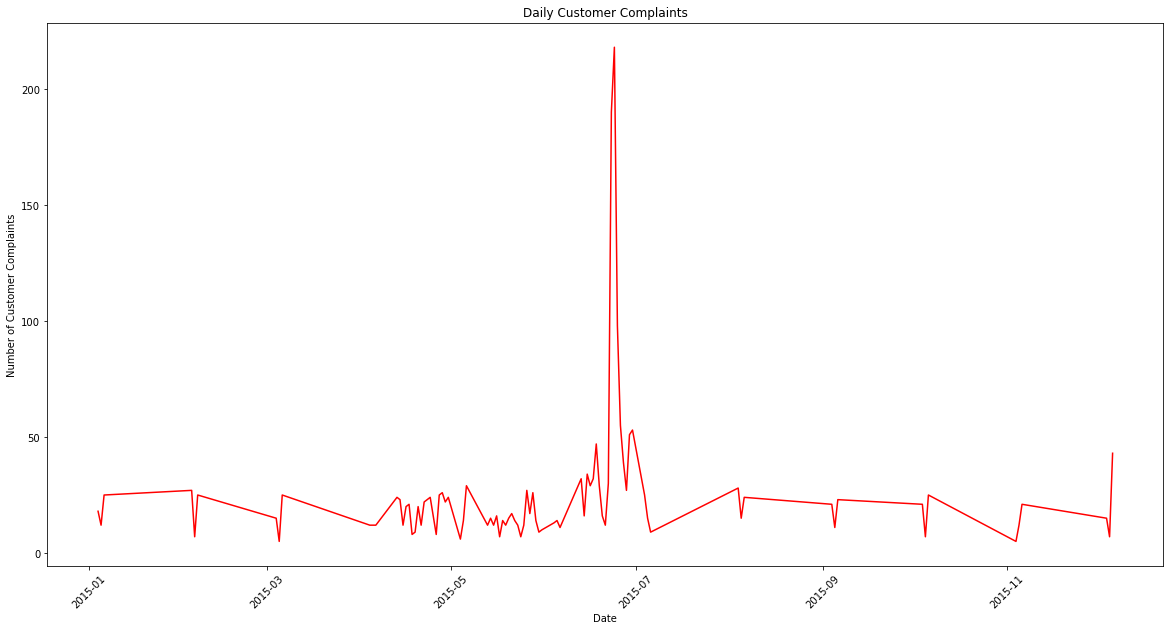

In [169]:
#Daily Customer Complaints
fig, ax = plt.subplots(figsize=(20, 10))

# Add x-axis and y-axis
ax.plot(df_telecom_comp.groupby(["Date"]).size(),
        color='red')
# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Number of Customer Complaints",
       title="Daily Customer Complaints")
plt.setp(ax.get_xticklabels(), rotation=45)
plt.show()


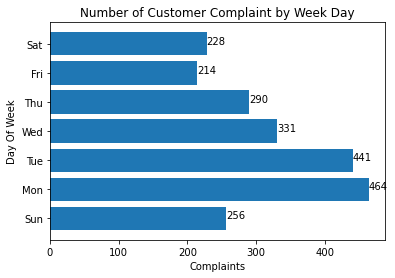

In [170]:
#Day of Week Customer Complaints
plt.barh(sorted(df_telecom_comp.Date.dt.dayofweek.unique()),df_telecom_comp.groupby(df_telecom_comp.Date.dt.dayofweek).size())
plt.title('Number of Customer Complaint by Week Day')
plt.ylabel('Day Of Week')
plt.xlabel('Complaints')
for index, value in enumerate(df_telecom_comp.groupby(df_telecom_comp.Date.dt.dayofweek).size()):
    plt.text(value, index, str(value))
plt.yticks(sorted(df_telecom_comp.Date.dt.dayofweek.unique()), ('Sun','Mon','Tue','Wed','Thu','Fri','Sat'))
plt.show()


<h2>Provide a table with the frequency of complaint types

In [171]:
#List all Titles
df_telecom_comp["Customer Complaint"].str.title().value_counts()

Comcast                                                                     102
Comcast Data Cap                                                             30
Comcast Internet                                                             29
Comcast Data Caps                                                            21
Comcast Billing                                                              18
                                                                           ... 
Comcast.                                                                      1
Incomplete Billing Cycle                                                      1
Internet/Phone                                                                1
Significant Quality Loss                                                      1
Charge For Equipment From Comcast I Was Not Made Aware When I Ordered It      1
Name: Customer Complaint, Length: 1740, dtype: int64

In [172]:
#Assign Category
df_telecom_comp["Complaint Category"] = np.where(df_telecom_comp["Customer Complaint"].str.contains('Internet|Speed|wifi|Access|Throttling|throt|Broadband|Cable|connection|DSL|modem|ip|ISP',case=False,regex=True), 'Internet',
                  np.where(df_telecom_comp["Customer Complaint"].str.contains('\$|Price|Pricing|Cost|Payment|Charg|pay|Bill|Billing|Rate|Contract|fee',case=False,regex=True), 'Billing',
                           np.where(df_telecom_comp["Customer Complaint"].str.contains('Service|Cap|usage|Data|Customer|switch|wait|support|TV|avail|network|cramming',case=False,regex=True), 'Network',
                                    np.where(df_telecom_comp["Customer Complaint"].str.contains('Customer|complaint|breach|bully|False|fed up',case=False,regex=True), 'Customer Grievance',
                                        np.where(df_telecom_comp["Customer Complaint"].str.contains('email',case=False,regex=True), 'Email',
                                                 np.where(df_telecom_comp["Customer Complaint"].str.contains('outages',case=False,regex=True), 'Outages',
                                             'Other'))))))

In [173]:
#Printing Values for Category
print(df_telecom_comp["Complaint Category"].str.title().value_counts())
print("\n\n",df_telecom_comp[df_telecom_comp["Complaint Category"] == "Other"][["Complaint Category","Customer Complaint"]])

Internet              764
Billing               553
Network               442
Other                 413
Customer Grievance     42
Email                   8
Outages                 2
Name: Complaint Category, dtype: int64


      Complaint Category                                 Customer Complaint
23                Other                Comcast monopoly bundling practices
24                Other                                           COMCAST!
32                Other                        XFINITY Movers Edge program
34                Other                    Comcast not refunding my credit
35                Other                                            Comcast
...                 ...                                                ...
2175              Other  Comcast Failing to Show up to scheduled appoin...
2180              Other                                            Comcast
2189              Other                                            Comcast
2191              Other   

In [174]:
#Display Values in Category
from tabulate import tabulate
print(tabulate(df_telecom_comp.groupby(['Complaint Category']).size().to_frame(), headers=['Complaint Category','Number of Complaints'], tablefmt="grid"))

+----------------------+------------------------+
| Complaint Category   |   Number of Complaints |
+======================+========================+
| Billing              |                    553 |
+----------------------+------------------------+
| Customer Grievance   |                     42 |
+----------------------+------------------------+
| Email                |                      8 |
+----------------------+------------------------+
| Internet             |                    764 |
+----------------------+------------------------+
| Network              |                    442 |
+----------------------+------------------------+
| Other                |                    413 |
+----------------------+------------------------+
| Outages              |                      2 |
+----------------------+------------------------+


<h2>Which complaint types are maximum i.e., around internet, network issues, or across any other domains

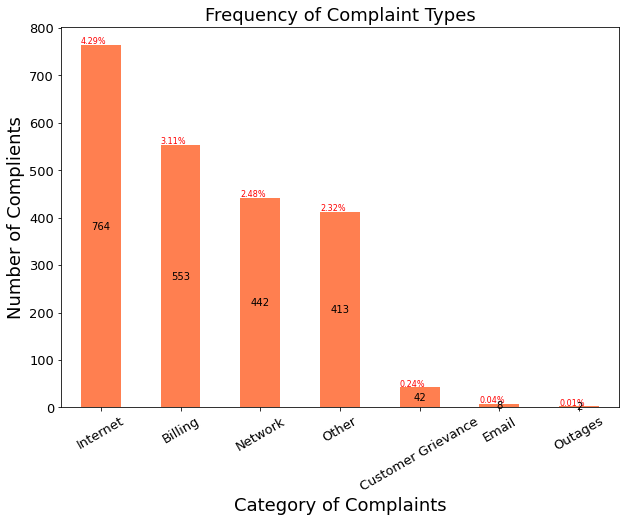

In [175]:
#Percentage of Issues By Category
ax = df_telecom_comp['Complaint Category'].value_counts().plot(kind='bar', figsize=(10,7),
                                        color="coral", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Frequency of Complaint Types", fontsize=18)
ax.set_xlabel("Category of Complaints", fontsize=18);
ax.set_ylabel("Number of Complients", fontsize=18);
ax.tick_params(axis='x', labelrotation=30)
#ax.set_yticks([100, 300, 500, 700, 900])

for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.text(i.get_x(), i.get_height()+2, str(round((i.get_height()/total)*100, 2))+'%', fontsize=8,color ="red")
    ax.text(x+width/2, y+height/2,'{:.0f}'.format(height), horizontalalignment='center', verticalalignment='center')

<h2>Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed

In [176]:
#Creating New Category for Status
df_telecom_comp["Consolidated Status"] = df_telecom_comp["Status"].map({"Solved":"Closed", "Closed":"Closed", "Pending":"Open", "Open":"Open"})

In [177]:
#Display first 5 Rows of Ticket status by State
(df_telecom_comp.groupby(["State","Consolidated Status"]).size().unstack(level=-1).fillna(0)).head(5)

Consolidated Status,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,0.0
California,159.0,61.0
Colorado,58.0,22.0


In [178]:
#Create New DF with State and Status
complaints_status = pd.crosstab(df_telecom_comp["State"], df_telecom_comp["Consolidated Status"])
complaints_status.head(5)

Consolidated Status,Closed,Open
State,,
Alabama,17,9
Arizona,14,6
Arkansas,6,0
California,159,61
Colorado,58,22


<h2>Provide state wise status of complaints in a stacked bar chart

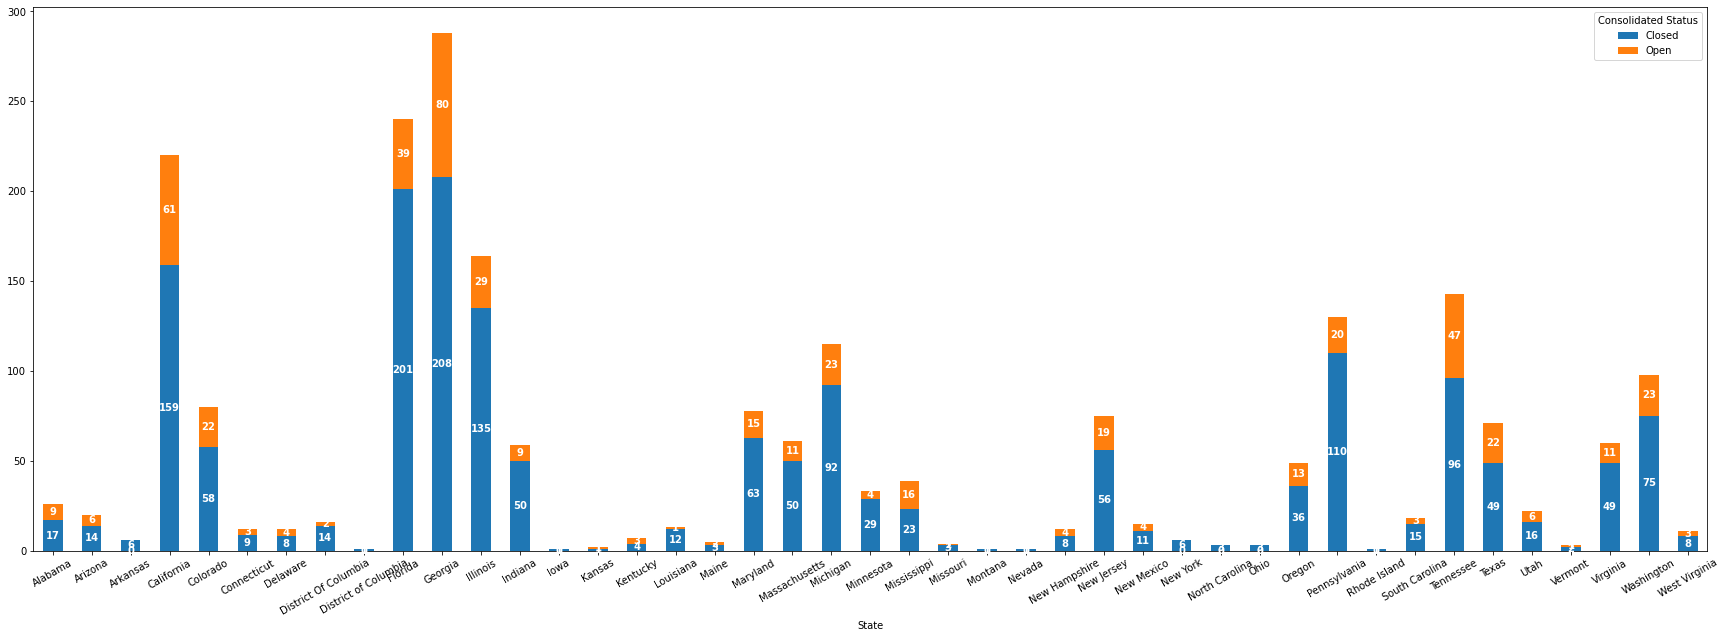

In [179]:
#State wise Open and Resolved Tickets
ax = complaints_status.plot.bar(figsize=(30,10), stacked=True)
ax.tick_params(axis='x', labelrotation=30)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.0f}'.format(height), 
            color="white",
            fontweight='bold',
            horizontalalignment='center', 
            verticalalignment='center')

**Now it`s clearly shown that the highest number of complaints recorded from the state Georgia and the second highest number of complaints recorded from the state Florida.**

<AxesSubplot:title={'center':'State wise status of complaints'}, xlabel='State', ylabel='Number of complaints'>

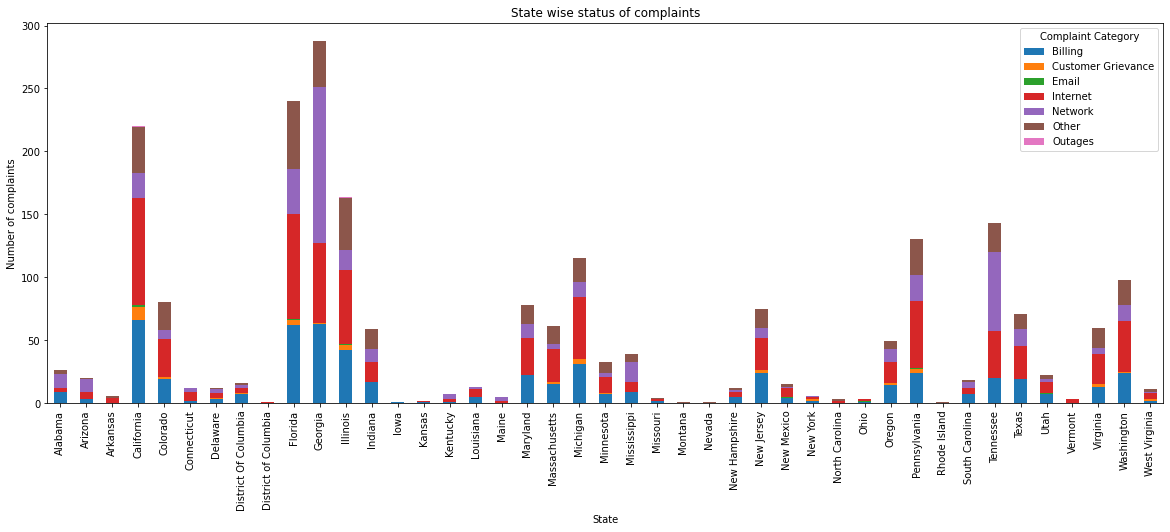

In [180]:
# Plot a stacked plot for state wise complaint types
df_telecom_comp.groupby(["State","Complaint Category"]).size().unstack(level=-1).fillna(0).plot(kind='bar', figsize = (20,7), title  = 'State wise status of complaints',xlabel = 'State', ylabel = 'Number of complaints', stacked = True)

In [181]:
#State wise Open and Resolved percentage
complaints_status["Total"] = complaints_status.Open + complaints_status.Closed
complaints_status["Resolved%"] = round((complaints_status.Closed / complaints_status.Total) * 100)
complaints_status["Unresolved%"] = round((complaints_status.Open / complaints_status.Total) * 100)
complaints_status["Overall_Closed%"] = round((complaints_status["Closed"] / complaints_status["Closed"].sum())*100,2)
complaints_status["Overall_Open%"] = round((complaints_status["Open"] / sum(complaints_status["Open"]))*100,2)
complaints_status.head(5)

Consolidated Status,Closed,Open,Total,Resolved%,Unresolved%,Overall_Closed%,Overall_Open%
State,,,,,,,
Alabama,17,9,26,65.0,35.0,1.00,1.74
Arizona,14,6,20,70.0,30.0,0.82,1.16
Arkansas,6,0,6,100.0,0.0,0.35,0.00
California,159,61,220,72.0,28.0,9.31,11.80
Colorado,58,22,80,72.0,28.0,3.40,4.26


<h2>Which state has the highest percentage of unresolved complaints

In [182]:
#State with maxmium percentage of unresolved complaints
print('\033[1m','\nState with highest number of Unresolved complaints : ',complaints_status["Overall_Open%"].idxmax())
print('\033[0m','\n')
print(tabulate(complaints_status.loc[complaints_status["Overall_Open%"].idxmax()].to_frame(), headers=['Ticket Status Summary','Count'], tablefmt="grid"))

 
State with highest number of Unresolved complaints :  Georgia
 

+-------------------------+---------+
| Ticket Status Summary   |   Count |
+=========================+=========+
| Closed                  |  208    |
+-------------------------+---------+
| Open                    |   80    |
+-------------------------+---------+
| Total                   |  288    |
+-------------------------+---------+
| Resolved%               |   72    |
+-------------------------+---------+
| Unresolved%             |   28    |
+-------------------------+---------+
| Overall_Closed%         |   12.19 |
+-------------------------+---------+
| Overall_Open%           |   15.47 |
+-------------------------+---------+


<h2>Which state has the maximum complaints

In [183]:
#State with maxmium complaints
print('\033[1m','\nState with maximum complaints : ',complaints_status["Total"].idxmax())
print('\033[0m','\n')
print(tabulate(complaints_status.loc[complaints_status["Total"].idxmax()].to_frame(), headers=['Ticket Status Summary','Count'], tablefmt="grid"))

 
State with maximum complaints :  Georgia
 

+-------------------------+---------+
| Ticket Status Summary   |   Count |
+=========================+=========+
| Closed                  |  208    |
+-------------------------+---------+
| Open                    |   80    |
+-------------------------+---------+
| Total                   |  288    |
+-------------------------+---------+
| Resolved%               |   72    |
+-------------------------+---------+
| Unresolved%             |   28    |
+-------------------------+---------+
| Overall_Closed%         |   12.19 |
+-------------------------+---------+
| Overall_Open%           |   15.47 |
+-------------------------+---------+


<h2>Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls

In [184]:
#Creating a new DF for Channel through whcih complaints received
complaints_received_channel = pd.crosstab(df_telecom_comp["Received Via"], df_telecom_comp["Consolidated Status"])
complaints_received_channel

Consolidated Status,Closed,Open
Received Via,,
Customer Care Call,864,255
Internet,843,262


In [185]:
#Channel wise Open and Resolved percentage
complaints_received_channel["Total"] = complaints_received_channel.Open + complaints_received_channel.Closed
complaints_received_channel["Resolved%"] = round((complaints_received_channel.Closed / complaints_received_channel.Total) * 100)
complaints_received_channel["Unresolved%"] = round((complaints_received_channel.Open / complaints_received_channel.Total) * 100)
complaints_received_channel["Overall_Closed%"] = round((complaints_received_channel["Closed"] / complaints_received_channel["Closed"].sum())*100,2)
complaints_received_channel["Overall_Open%"] = round((complaints_received_channel["Open"] / sum(complaints_received_channel["Open"]))*100,2)
complaints_received_channel


Consolidated Status,Closed,Open,Total,Resolved%,Unresolved%,Overall_Closed%,Overall_Open%
Received Via,,,,,,,
Customer Care Call,864,255,1119,77.0,23.0,50.62,49.32
Internet,843,262,1105,76.0,24.0,49.38,50.68


In [186]:
#Channel with maxmium percentage of resolved complaints
print('\033[1m','\nChannel with maximum percentage of resolved complaints : ',complaints_received_channel["Resolved%"].idxmax())
print('\033[0m','\n')
print(tabulate(complaints_received_channel.loc[complaints_received_channel["Resolved%"].idxmax()].to_frame(), headers=['Ticket Status Summary','Count'], tablefmt="grid"))

 
Channel with maximum percentage of resolved complaints :  Customer Care Call
 

+-------------------------+---------+
| Ticket Status Summary   |   Count |
+=========================+=========+
| Closed                  |  864    |
+-------------------------+---------+
| Open                    |  255    |
+-------------------------+---------+
| Total                   | 1119    |
+-------------------------+---------+
| Resolved%               |   77    |
+-------------------------+---------+
| Unresolved%             |   23    |
+-------------------------+---------+
| Overall_Closed%         |   50.62 |
+-------------------------+---------+
| Overall_Open%           |   49.32 |
+-------------------------+---------+


In [187]:
# Complaints received through Internet and Customer Care call with resolved percentage
print("Resolved % of complaints, received through Internet :  {}%".format(complaints_received_channel.loc['Internet']['Overall_Closed%']))
print("Resolved % of complaints, received through Customer Care Call : {}%".format(complaints_received_channel.loc['Customer Care Call']['Overall_Closed%']))

Resolved % of complaints, received through Internet :  49.38%
Resolved % of complaints, received through Customer Care Call : 50.62%


array([<AxesSubplot:ylabel='Overall_Closed%'>], dtype=object)

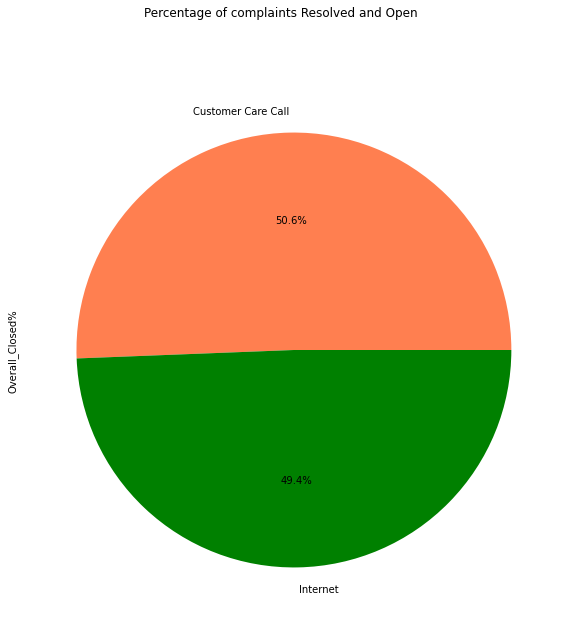

In [189]:
complaints_received_channel["Overall_Closed%"].plot(kind='pie', subplots=True,figsize=(15,10), autopct='%1.1f%%',colors = ['coral','green'], title='Percentage of complaints Resolved and Open')

<h1>End Of Project